In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
NUM_TRIALS = 10000
EPS = 0.1
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]

In [3]:
len(BANDIT_PROBABILITIES)

3

In [4]:
class Bandit:
  def __init__(self, p):
    # p: the win rate
    self.p = p
    self.p_estimate = 0 # TODO
    self.N = 0 # TODO number of samples collected so far

  def pull(self):
    # draw a 1 with probability p
    return np.random.random() < self.p # NOTE that True is equivalent to 1 in python

  def update(self, x):
    self.N = self.N + 1 # TODO
    # self.p_estimate = self.p_estimate + (x-self.p_estimate)/self.N # TODO devive from the formula calculating mean of Xn using X(n-1) and x, which is the exactly same as the formula below
    self.p_estimate = ((self.N-1)*self.p_estimate + x)/self.N # devive from the formula calculating mean of Xn using X(n-1) and x, which is the exactly same as the formula above

In [5]:
def experiment():
  bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]

  rewards = np.zeros(NUM_TRIALS) # returnn a new array of all zeros of given shape, so all rewards are 0 to begin with
  num_times_explored = 0
  num_times_exploited = 0
  num_optimal = 0
  optimal_j = np.argmax([b.p for b in bandits]) # argmax: return the index of the maxium values 
  print("optimal j:", optimal_j)

  for i in range(NUM_TRIALS):

    # use epsilon-greedy to select the next bandit
    if np.random.random() < EPS:
      num_times_explored += 1
      j = np.random.randint(len(BANDIT_PROBABILITIES))# TODO not for Len() function high bound is EXCLUSIVE
    else:
      num_times_exploited += 1
      j = np.argmax([b.p_estimate for b in bandits])# TODO j is the largest of the projected bandit mean, NOTE do NOT forget the square bracket!

    if j == optimal_j:
      num_optimal += 1

    # pull the arm for the bandit with the largest sample
    x = bandits[j].pull()

    # update rewards log
    rewards[i] = x

    # update the distribution for the bandit whose arm we just pulled
    bandits[j].update(x)


  # print mean estimates for each bandit
  for b in bandits:
    print("mean estimate:", b.p_estimate)

  # print total reward
  print("total reward earned:", rewards.sum())
  print("overall win rate:", rewards.sum() / NUM_TRIALS)
  print("num_times_explored:", num_times_explored)
  print("num_times_exploited:", num_times_exploited)
  print("num times selected optimal bandit:", num_optimal)

  # plot the results
  cumulative_rewards = np.cumsum(rewards)
  win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
  plt.plot(win_rates)
  plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
  plt.show()

optimal j: 2
mean estimate: 0.21893491124260367
mean estimate: 0.5337423312883435
mean estimate: 0.7518209083119114
total reward earned: 7267.0
overall win rate: 0.7267
num_times_explored: 996
num_times_exploited: 9004
num times selected optimal bandit: 9336


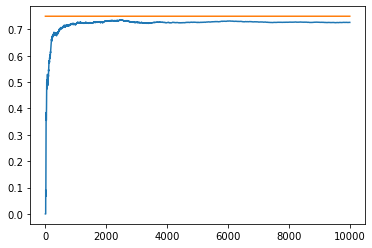

In [6]:
if __name__ == "__main__":
    experiment()